In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing dataset

df = pd.read_csv(r"..\..\sources\initial_datasets\initial_hotels_dataset.csv", sep = ';')


C:\Users\Margni\.virtualenvs\code_blueprint-DgG63NCU\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(df['countryName'].value_counts())

United States                     46293
Italy                             24414
United Kingdom                    19400
Germany                           17339
China                             16824
                                  ...  
Sao Tome And Principe                 1
Afghanistan                           1
Eritrea                               1
Montserrat                            1
Federated States Of Micronesia        1
Name: countryName, Length: 210, dtype: int64


In [4]:
# missing values count

df.isnull().sum() # no missing values for important features

hotelName          0
stars              0
price              0
cityName           0
countryCode      104
countryName        0
address            0
location           0
url            85348
latitude           0
longitude          0
dtype: int64

In [5]:
df[["price"]].describe()

,price
count,293534.000000
mean,21364.140144
std,40895.373526
min,4.000000
25%,60.000000
50%,94.000000
75%,210.000000
max,99999.000000


In [6]:
# filling 99'999 prices to NaN

df["price"] = np.where(df["price"] == 99999, np.nan, df["price"])

C:\Users\Margni\.virtualenvs\code_blueprint-DgG63NCU\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

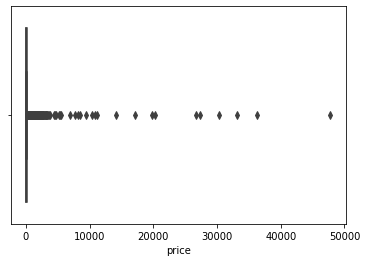

In [7]:
sns.boxplot(df["price"])

In [8]:
df = df[pd.to_numeric(df['latitude'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['longitude'], errors='coerce').notnull()]
df = df.astype({"latitude": float, "longitude": float})

df = df[(df["longitude"] < 90) & (df["longitude"] > -90) & (df["latitude"] > -90)  & (df["latitude"] < 90)]


In [9]:
df1 = df[df["countryCode"] == "CH"]
df1 = df1[["hotelName", "stars", "price", "countryName", "cityName", "address","url", "latitude", "longitude"]]

In [ ]:
# function to calculate distance

from math import sin, cos, sqrt, atan2, radians


def calculate_distance(lat1, lon1, lat2, lon2):
# approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c * 1000 # in meters

    return distance



In [11]:
# calculate references found for hotels proportions 

# df2 = pd.read_csv(r"..\..\sources\initial_datasets\hotels_df_from_poi.csv", sep = ',')
#
#
# n = 0
# d = 0
# o = 0
# u = 0
# for row2 in df2[0:100].iterrows():
#     # print("---------------------------------------------------")
#     # print(row1[1]["hotelName"], row1[1]["stars"])
#     n += 1
#     one = True
#     only_one = 0
#
#     for row1 in df1.iterrows():
#         if calculate_distance(row1[1]["latitude"], row1[1]["longitude"], row2[1]["LAT"], row2[1]["LON"]) < 20:
#             # print(row2[1]["NAME"], row2[1]["OTHER_TAGS"])
#             d += 1
#             if only_one is False:
#                 u += 1
#                 only_one = True
#             if one is False:
#                 o += 1
#             else:
#                 one = False
#             if only_one == 0:
#                 only_one = False
#
#
# print(f"Number samples: {n}, n of hotels with almost a reference: {d}, n of hotels with more than 1 reference: {u}")

using df1 as default and 1000 samples

 with 5 m   96 2 2
 with 10 m  210 6  5
 with 20 m  369 22 20
 with 30 m  478 60 52
 with 40 m  580 111 91
 with 50 m  699 190 131

using df2 as default and 1000 samples

 with 5 m   122 2 2
 with 10 m  292 5 5
 with 20 m  469 18 18
 with 30 m  571 52 44
 with 40 m  658 102 83


using df2 as default and all samples (~3879)

with 20 m 1588 76 70

In [12]:
df1.to_csv("../../sources/finite_datasets/hotels_dataset.csv")